# Heisenberg uncertainty principle


## Introduction

You have probably heard of the uncertainty principle, even outside of your physics courses. A common colloquial restatement of uncertainty is "By looking at something, you influence it." That is certainly true. But a more physical way of describing uncertainty is that there are certain physical observables that have an incompatibility that prevents them both from being simultaneously known to arbitrary accuracy. Many students first encounter the pair of incompatible variables $x$ and $p_x$, meaning the position along one axis called the $x$-axis, and the linear momentum along that direction, respectively. For those variables the constraint on uncertainty is written
$$\Delta x \Delta p_x \geq \frac{\hbar}{2}.$$
Here, $\Delta x$ is called the "uncertainty in $x$", which has the same definition as standard deviation in statistics, and can be defined as
$$\Delta x = \sqrt{\langle x^2 \rangle - \langle x \rangle^2}.$$
$\Delta p_x$ is defined in the same way.
Here, we will not derive this uncertainty relation; we will point out that it is consistent with our understanding of classical waves. That is, a wave with truly one perfect frequency $f$ and wavelength $\lambda$ would go on and on forever as a perfect sinusoid. Quantum mechanically, this would correspond to knowing the momentum perfectly according to de Broglie's hypothesis: $\lambda = h/p$. But in order to know $where$ a wave-like particle is located, the wave describing it must become more sharply peaked in space, like a very narrow Gaussian, for example. We know that we can express any continuous function, including such sharply-peaked wave functions, as a Fourier series of sinusoidal functions with different wavelengths. But as the wave function becomes more sharply peaked (and the position is better known), we will require more terms in the Fourier series, meaning a mixture of more wavelengths (and thus, quantum mechanically, more values of momentum).

Stated more simply: a state with a well-defined momentum (a perfect sinusoid in space) has very uncertain position. A state with a well-defined position (like a Dirac delta distribution) has a very uncertain momentum.

There are other variables that exhibit such incompatibility. For example, a particle's spin may have a well-defined projection along one axis, but then we know nothing about the project on an orthogonal axis. For example the state $|0\rangle \sim |\uparrow\rangle$ (for a qubit or spin-1/2 particle) has a definite projection along the $z$ axis (of 1 in the context of a qubit, and of $\hbar/2$ in the context of a spin-1/2 particle). But this state can be written as a superposition of two states each of which has a well-defined projection onto the $x$ axis:
$$|0\rangle = \frac{1}{\sqrt{2}}(|+\rangle_x+|-\rangle_x)$$
or equivalently
$$\begin{pmatrix} 1 \\ 0\end{pmatrix} = \frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1\end{pmatrix}+\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1\end{pmatrix}\right].$$
$|+\rangle_x$ has a well-defined projection onto $x$, as does $|-\rangle_x$. So if we specify the projection of a state along the $x$ axis, we do not know the projection along the $z$ axis. And if we specify the projection on the $z$ axis, we don't know the projection along $x$. There are minor differences when discussing this in the context of spin and in qubits. But generally speaking, eigenstates of the Pauli matrices have an interesting relationship that we can explore.
Throughout this lesson, we will be experimentally checking our intuition for the uncertainty in these incompatible variables, and verifying that uncertainty relations hold on IBM quantum computers.

Well, you may recall that the uncertainty relation between linear position and momentum could be written differently, explicitly using the commutation relation between the operators $x$ and $p_x$:
$$\Delta x \Delta p_x \geq \frac{1}{2}|\langle [x,p_x] \rangle|$$
where
$$[x,p_x] = xp_x-p_xx$$
is the commutator of $x$ and $p_x$.
This is the form that that can be most easily extended to the Pauli operators. Generally, for two operators $A$ and $B$,
$$\Delta A \Delta B \geq \frac{1}{2}|\langle [A,B] \rangle|.$$
And in the case of the Pauli matrices $X$ and $Z$, we need $[X,Z]$ in order to calculate
$$\Delta X \Delta Z \geq \frac{1}{2}|\langle [X,Z] \rangle|.$$
We show this here, and leave similar calculations to the reader as an exercise:
$$[X,Z] = XZ-ZX = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}-\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}\begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}$$
$$[X,Z] = \begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}-\begin{pmatrix}0 & 1 \\ -1 & 0\end{pmatrix} = 2\begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}$$
This is a perfectly acceptable answer, but with one more step, we see
$$[X,Z] = -2i\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}=-2iY$$
Our uncertainty relation thus becomes
$$\Delta X \Delta Z \geq |\langle Y \rangle|.$$

### Check-in question

Determine $[X,Y]$ and $[Y,Z]$. Use this to write down the uncertainty relations between $X$ & $Y$, and $Y$ & $Z$.


### Verify consistency

Before moving on, let us check that this was consistent with our previous finding. We used the state $|\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}.$ And we found that $\Delta X \Delta Z  = 0.171.$ Now we know this product should be greater than or equal to
$$|\langle Y \rangle|=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}$$
$$|\langle Y \rangle| = \frac{1}{2}\begin{pmatrix} 1 & 1 \end{pmatrix}\begin{pmatrix} -i \\ i \end{pmatrix} = \frac{1}{2}(-i+i) = 0.$$
So indeed, $\Delta X \Delta Z  = 0.171 \geq |\langle Y \rangle|=0$

In [1]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
backend_sim = AerSimulator()
simulator = AerSimulator()

#Import an estimator, this time from qiskit (we import from Runtime for real hardware)
from qiskit.primitives import BackendSampler
sampler = BackendSampler(backend = backend_sim)
import numpy as np
from qiskit.visualization import plot_bloch_vector, plot_histogram
import matplotlib.pyplot as plt

from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit, Parameter
from qiskit import QuantumCircuit, transpile
from qiskit.result import marginal_counts
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator


import matplotlib.ticker as tck

from qiskit.visualization import plot_bloch_multivector

/var/folders/r8/01h7mk295_qg6429pfv0cscc0000gn/T/ipykernel_82434/607154366.py:8: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  sampler = BackendSampler(backend = backend_sim)


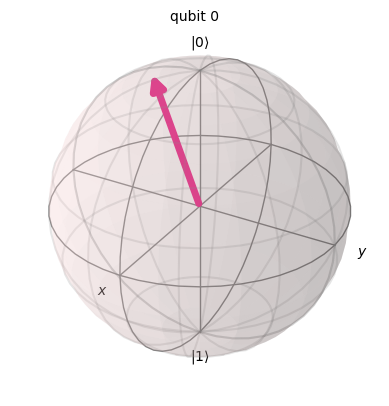

In [2]:
# Non commutative measurements
# Exercise: Write a circuit that prepares a random state and measures it on the Z basis and then the X basis, and then vice-versa (X basis first, then Z basis) and compare the statistics
def random_state():
    # Random state
    theta = np.random.uniform(0, 2*np.pi)
    phi = np.random.uniform(0, np.pi)
    psi = [np.cos(phi/2), np.exp(1j*theta)*np.sin(phi/2)]
    return psi
psi0 = random_state() # Define initial_state as random
plot_bloch_multivector(psi0)

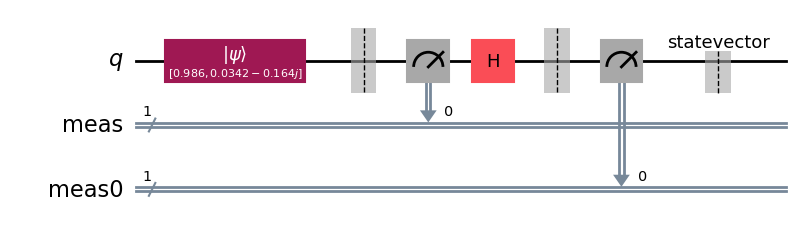

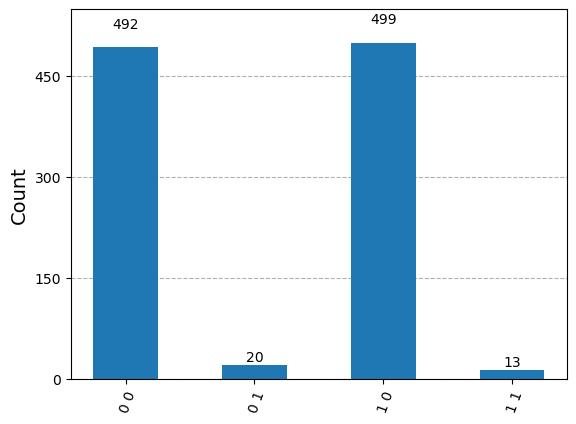

In [3]:
# Circuit to measure in Z basis first, then X basis
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
qc.initialize(psi0, 0) # Apply initialisation operation to the 0th qubit
qc.measure_all()
qc.h(0)
qc.measure_all()
qc.save_statevector()
display(qc.draw('mpl')) # Let's view our circuit

sim = AerSimulator() # Tell Qiskit how to simulate our circuit
result = sim.run(qc).result() # Do the simulation and return the results

state = result.get_statevector() #Get StateVector
plot_histogram(result.get_counts()) #Get Counts

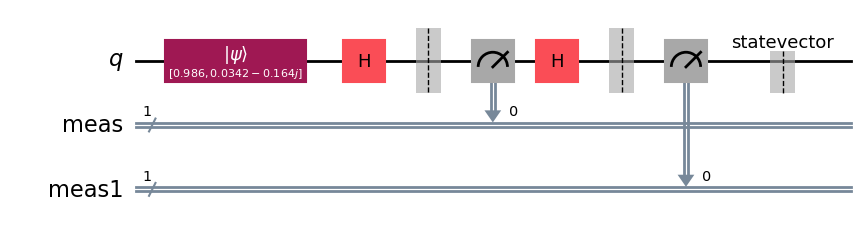

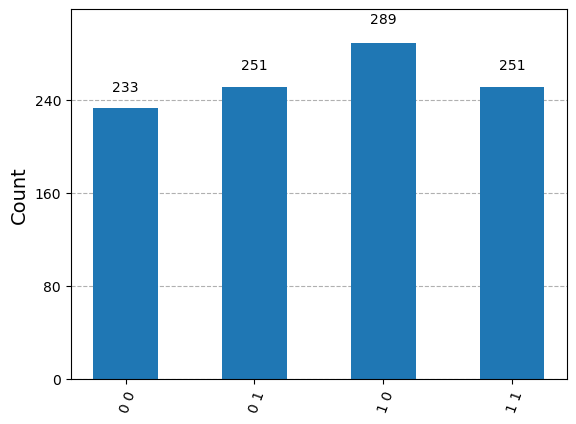

In [4]:
# Circuit to measure in X basis first, then Z basis
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
qc.initialize(psi0, 0) # Apply initialisation operation to the 0th qubit

qc.h(0)
qc.measure_all()
qc.h(0)
qc.measure_all()
qc.save_statevector()
display(qc.draw('mpl')) # Let's view our circuit

sim = AerSimulator() # Tell Qiskit how to simulate our circuit
result = sim.run(qc).result() # Do the simulation and return the results

state = result.get_statevector() #Get StateVector
plot_histogram(result.get_counts()) #Get Counts


#### Checking uncertainty principle with X,Z 
$$
\Delta X \Delta Y \geq 1/2 |\langle[X,Y] \rangle|
$$

We can quantify this using uncertainty, or variance. The "uncertainty" is often defined to be the square root of the "variance" of a distribution. That is, the uncertainty for some observable $S$ is denoted $\Delta S$ and is given by

$$(\Delta S)^2 \equiv \langle (S - \langle S \rangle)^2 \rangle$$
$$(\Delta S)^2 = \langle S^2 - 2 S \langle S \rangle +\langle S \rangle^2 \rangle$$
$$(\Delta S)^2 = \langle S^2 \rangle - \langle S \rangle^2$$

For the case of Pauli matrices, for which $S^2 = I$, this becomes

$$(\Delta S)^2 = 1 - \langle S \rangle^2$$

Let's apply this to a concrete example. Let's start with the state $|\psi\rangle |+\rangle_y = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ i \end{pmatrix},$ and let's determine the uncertainty of the observable $X$ in that state.

We can create an arbitrary initial state using ```qc.initialize()```. Note that the syntax for the imaginary unit here is $1j$.

### Check-in question: 

Calculate the uncertainty of $X$ in the state $|+\rangle_y = |+i\rangle$, by hand.

<details>
<summary>Answer:</summary>

$$\Delta X =\sqrt{\langle+i| X^2 |+i\rangle - \langle+i| X |+i\rangle^2}$$
In the given state, this yields:
$$\Delta X =\sqrt{\frac{1}{\sqrt{2}}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ i\end{pmatrix} - \left(\frac{1}{\sqrt{2}}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ i\end{pmatrix}\right)^2}$$
$$\Delta X =\sqrt{\frac{1}{2}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix} \begin{pmatrix}1 \\ i\end{pmatrix} - \left(\frac{1}{2}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}i \\ 1\end{pmatrix}\right)^2}$$
$$\Delta X =\sqrt{\frac{1}{2}\begin{pmatrix}1 & -i\end{pmatrix} \begin{pmatrix}1 \\ i\end{pmatrix} - \left(\frac{1}{2}(0))\right)^2}$$
$$\Delta X =\sqrt{\frac{1}{2}(2)} = 1$$

</details>

### In order to do so we need three different experiments: one to compute the deviation of the measurements, and one to compute the expectation value of the commutator.


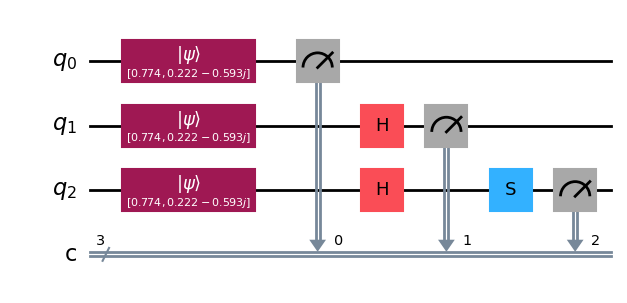

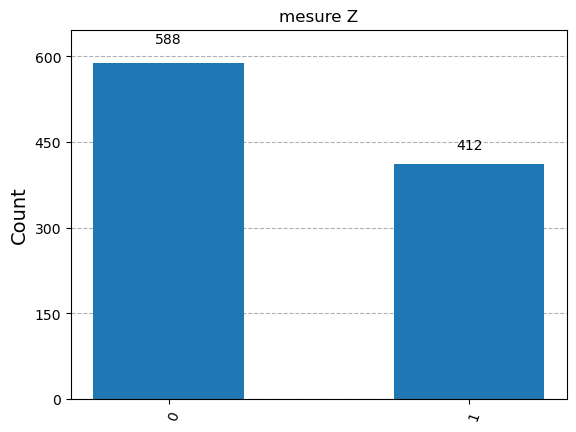

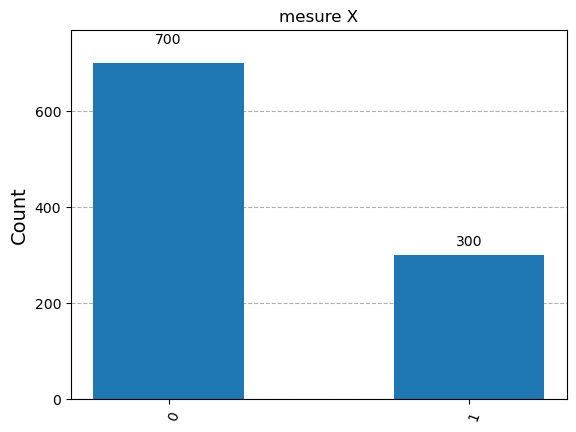

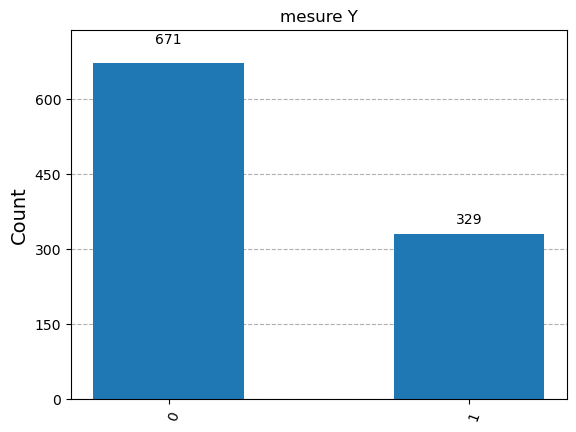

{'101': 94, '110': 54, '001': 187, '100': 144, '111': 37, '011': 94, '010': 115, '000': 275}
0.9022084903169555
0.939699952112375
False


In [6]:
# Let's verify Heisenberg's uncertainty principle 

# Exercise: Compute the standard deviation of the results of Z , and then of X, and compare the results with the expectation value of Y
qc = QuantumCircuit(3, 3) # Create a quantum circuit with 3 qubit

psi = random_state() # Define initial_state as random

qc.initialize(psi, 0)
qc.initialize(psi, 1)
qc.initialize(psi, 2)

# Circuit to measure X
# Simulation of X, and computation of the standard deviation (remember that measuring 0, corresponds to having measured the eigenvalue -1)
qc.measure(0,0)

# Circuit to measure Z
# Simulation of Z, and computation of the standard deviation (remember that measuring 0, corresponds to having measured the eigenvalue -1)
qc.h(1)
qc.measure(1,1)

# Circuit to measure Y
qc.h(2)
qc.s(2)
qc.measure(2,2)

display(qc.draw('mpl')) # Let's view our circuit

sim = AerSimulator() # Tell Qiskit how to simulate our circuit
result = sim.run(qc, shots = 1000).result().get_counts() # Do the simulation and return the results


display(plot_histogram(marginal_counts(result, [0]), title = 'mesure Z')) #Get Counts
display(plot_histogram(marginal_counts(result, [1]), title = 'mesure X')) #Get Counts
display(plot_histogram(marginal_counts(result, [2]), title = 'mesure Y')) #Get Counts
print(result)

mesure_x0 = result['101'] + result['001'] + result['100'] + result['000']
mesure_y0 = result['001'] + result['011'] + result['010'] + result['000']
mesure_z0 = result['110'] + result['100'] + result['010'] + result['000']

mesure_x1 = 1000 - mesure_x0
mesure_y1 = 1000 - mesure_y0
mesure_z1 = 1000 - mesure_z0


EX = (mesure_x0*(-1) + mesure_x1)/(mesure_x0 + mesure_x1)
EY = (mesure_y0*(-1) + mesure_y1)/(mesure_y0 + mesure_y1)
EZ = (mesure_z0*(-1) + mesure_z1)/(mesure_z0 + mesure_z1)

deltaX = np.sqrt(1 - EX**2)
deltaY = np.sqrt(1 - EY**2)
deltaZ = np.sqrt(1 - EZ**2)

print(deltaX*deltaZ)
print(deltaY)
print(deltaX*deltaZ >= np.abs(deltaY))


# Let's now loop through the Bloch sphere

Consider a generic qubit state:

$$
|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle
$$

where we fix $\phi$ and sweep $\theta$

In [ ]:
# Exercise: test the validity of the Heisenberg uncertainty principle by computing the standard deviations of Z and X, and the expectation value of Y for a range of θ values
shots = 1000 # Number of shots
phi = np.pi/2
theta_range = np.linspace(0, 2*np.pi, 25)



In [ ]:
# Check that even for few samples, the uncertainty principle is satisfied withing the statistical error

In [ ]:
# Using the codes from the previous exercises, run the same circuits on a quantum computer!

### As you sample through your measurements the accuracy of your estimation of the expectation value will actually decrease with the number of samples.
#### The accuracy of the estimation is given by:

$$
\sigma^2_{est} = \sigma^2_{measure}/N
$$

If you want to know more https://en.wikipedia.org/wiki/Estimator

# Run it now on a QPU

In [ ]:
# transpiling the circuits
from qiskit_ibm_runtime import QiskitRuntimeService
# Let s find the least busy backend
service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.least_busy()
print(backend.name)
sampler = Sampler(mode=backend)
sampler.options.default_shots = 100

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend) 


In [ ]:
# Define your parametric circuits on Theta
theta = Parameter('θ')

# qc_z
qc_z = QuantumCircuit(1, 1)

# qc_x

# qc_y


In [ ]:
# transpiling the circuits
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

qc_z_transpiled = pm.run(qc_z)
qc_x_transpiled = pm.run(qc_x)
qc_y_transpiled = pm.run(qc_y)

In [ ]:
theta_values = np.linspace(0, np.pi, 10)

In [ ]:
shots = 1_000

job = sampler.run([(qc_z_transpiled,theta_values), (qc_x_transpiled, theta_values), (qc_y_transpiled, theta_values)], shots=shots)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

In [ ]:
print(f">>> Job Status: {job.status()}")
result= job.result()
result[0].data.c[2].get_counts()

In [ ]:
import pandas as pd
data = []

for i, theta in enumerate(theta_values):
    print(i)

    def fill_counts(counts):
        return {'0': counts.get('0', 0), '1': counts.get('1', 0)}

    counts_z = fill_counts(result[0].data.c[i].get_counts())
    E_z = (counts_z['0'] - counts_z['1']) / shots
    Delta_z = np.sqrt(1 - E_z**2)

    counts_x = fill_counts(result[1].data.c[i].get_counts())
    E_x = (counts_x['0'] - counts_x['1']) / shots
    Delta_x = np.sqrt(1 - E_x**2)

    counts_y = fill_counts(result[2].data.c[i].get_counts())
    E_y = (counts_y['0'] - counts_y['1']) / shots
    Delta_y = np.sqrt(1 - E_y**2)

    # Store the results in a list
    data.append({
        'theta': theta, 'E_z': E_z, 'Delta_z': Delta_z,
        'E_x': E_x, 'Delta_x': Delta_x, 'E_y': E_y, 'Delta_y': Delta_y
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Compute additional columns
df['DeltaXDeltaZ'] = df['Delta_x'] * df['Delta_z']
df['HalfEy'] = 0.5 * np.abs(df['E_y'])

# # Display the DataFrame
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Quantum Data", dataframe=df)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['theta'], df['Delta_x'], label='ΔX')
plt.plot(df['theta'], df['Delta_z'], label='ΔZ')
plt.plot(df['theta'], df['DeltaXDeltaZ'], label='ΔX * ΔZ')
plt.plot(df['theta'], df['HalfEy'], label='1/2 E_y', linestyle='dashed')

plt.xlabel('Theta')
plt.ylabel('Values')
plt.title('Quantum Measurements')
plt.legend()
plt.grid()
plt.show()
    